Module 1 Midweek Project

Iris Classification

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

In [2]:
# load dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# separate training variables
iris_data = iris.data

# separate target variable
iris_labels = iris.target

In [4]:
# randomize data
np.random.seed(123)

indices = np.random.permutation(len(iris_data))
n_training_samples = 14
trainset_data = iris_data[indices[:-n_training_samples]]
trainset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

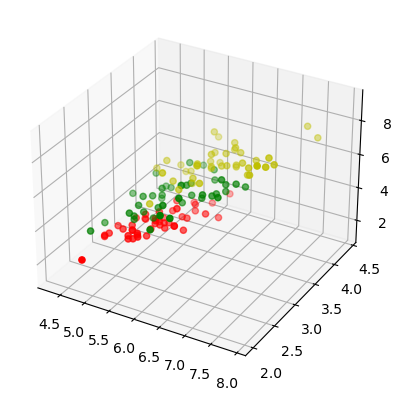

In [5]:
from matplotlib.figure import projections
X = [] #initialize an empty list X
for iclass in range(3):  #iclass = [0, 1, 2] following the target labels
  X.append([[], [], []]) #append an empty list containing three empty lists to X (for each class)
  for i in range(len(trainset_data)):
    if trainset_labels[i] == iclass:
      X[iclass][0].append(trainset_data[i][0])
      X[iclass][1].append(trainset_data[i][1])
      X[iclass][2].append(sum(trainset_data[i][2:])) #sum of remaining features

colours = ("r", "g", "y") # colours of three classes

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d') #add a 3D subplot to the figure

for iclass in range(3):
  ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c = colours[iclass])
plt.show()


In [6]:
# calculate the Euclidean distance between two instances
def distance(instance1, instance2):

  instance1 = np.array(instance1)
  instance2 = np.array(instance2)

  return np.linalg.norm(instance1 - instance2)

In [7]:
# find the k nearest neighbors
def get_neighbors(training_set, labels, test_instance, k, distance = distance):
  distances = []
  for index in range(len(training_set)):
    dist = distance(test_instance, training_set[index])
    distances.append((training_set[index], dist, labels[index]))
  distances.sort(key = lambda x: x[1]) # sort based on the second element (distance)
  neighbors = distances[:k] # assign the first k elements of the sorted distances list
  return(neighbors)

In [8]:
# calculate the most common class among the neighbors
def vote(neighbors):
  class_counter = Counter()
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]


In [9]:
for i in range(n_training_samples):
  neighbors = get_neighbors(trainset_data, trainset_labels,
                            testset_data[i], 3, distance = distance)
  print("index: ", i,
        ", result of vote: ", vote(neighbors),
        ", label: ", testset_labels[i],
        ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.7 1.2]
index:  1 , result of vote:  0 , label:  0 , data:  [4.6 3.2 1.4 0.2]
index:  2 , result of vote:  2 , label:  2 , data:  [6.2 3.4 5.4 2.3]
index:  3 , result of vote:  2 , label:  2 , data:  [5.7 2.5 5.  2. ]
index:  4 , result of vote:  1 , label:  1 , data:  [5.7 2.9 4.2 1.3]
index:  5 , result of vote:  1 , label:  1 , data:  [4.9 2.4 3.3 1. ]
index:  6 , result of vote:  2 , label:  2 , data:  [6.3 2.7 4.9 1.8]
index:  7 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  8 , result of vote:  2 , label:  1 , data:  [6.  2.7 5.1 1.6]
index:  9 , result of vote:  0 , label:  0 , data:  [5.1 3.5 1.4 0.3]
index:  10 , result of vote:  1 , label:  1 , data:  [5.1 2.5 3.  1.1]
index:  11 , result of vote:  1 , label:  1 , data:  [5.6 3.  4.5 1.5]
index:  12 , result of vote:  2 , label:  2 , data:  [6.2 2.8 4.8 1.8]
index:  13 , result of vote:  2 , label:  2 , data:  [7.2 3.6 6.1 2.5]


In [10]:
# calculate the distribution of the target variable
label_distr = Counter(iris_labels)

# calculate the total number of instances
total_instances = len(iris_labels)

# print the distribution with percentages
for label, count in label_distr.items():
    percentage = (count / total_instances) * 100
    print(f"Class {label}: {count} occurrences ({percentage:.2f}%)")

Class 0: 50 occurrences (33.33%)
Class 1: 50 occurrences (33.33%)
Class 2: 50 occurrences (33.33%)
